In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Setting rando seed to get reproducible runs
RSEED = 100

In [2]:
df = pd.read_csv("merged_indicatorsVSCancer.csv")
df

,Unnamed: 0,county,payann,estab,emp,ACID,ENRG,ETOX,EUTR,FOOD,...,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR,annual_count_avg
0,22002344,91,128668,594,4954,299.152569,7.286445e+05,1963.026340,26.933851,709.634497,...,0.000000e+00,2149.369209,4.351692e+05,0.002923,3.497395e-02,293475.377416,2949.632736,79914.159702,7851.498268,2179.0
1,41609466,516,953498,3340,32629,133.420049,6.931874e+03,3765.662479,132.635472,4843.498718,...,1.674254e+04,16148.087370,4.932628e+03,0.007422,8.577729e-02,1999.246044,4438.579174,576096.081165,1633.902304,8579.0
2,19847485,410,53138,361,1715,102.817249,6.064801e+00,3298.083216,13.598555,126.810329,...,0.000000e+00,554.606997,0.000000e+00,0.000153,4.371549e-02,6.064801,3649.913530,29611.275038,511.844967,1052.0
3,16221839,469,20778,205,655,30.042694,2.012683e+04,1807.410043,4.819015,76.420984,...,0.000000e+00,309.053357,0.000000e+00,0.000593,2.437340e-02,20126.828138,1064.780004,10666.884789,285.555832,961.0
4,23008810,855,61132,455,2161,32.192658,1.131970e+01,416.998063,4.320160,232.490017,...,0.000000e+00,896.650774,0.000000e+00,0.002463,6.501047e-03,11.319704,1165.911030,36511.029249,98.727235,2327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,6352509,3774,491651,989,9029,587.935749,3.629382e+06,813.473206,105.117742,1001.624899,...,1.394053e+06,4115.339612,3.628234e+06,0.003711,8.917167e-03,1147.804947,19410.599796,312217.341832,5945.474594,1231.0
3129,7237066,4524,361056,1402,8689,37.178584,9.249760e+02,7592.166446,25.091516,2044.202199,...,8.200278e+00,6423.591808,4.857347e+02,0.003347,2.019774e-01,439.241290,1412.961358,210925.667302,1777.330068,773.0
3130,5811849,3813,145379,442,3287,96.737078,1.919977e+06,112.140420,13.936063,384.841414,...,3.997271e+05,1420.508279,1.919961e+06,0.000773,4.621011e-04,16.608615,3486.862556,97322.166731,582.400056,635.0
3131,4442825,3053,31951,283,907,31.417667,2.756565e+05,28.072519,4.183471,101.472042,...,0.000000e+00,518.501787,2.756546e+05,0.000140,3.860924e-07,1.845259,1176.237930,20257.950393,20.344697,411.0


In [3]:
data=df[['ACID', 'ENRG',
       'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP',
       'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST',
       'REN', 'SMOG', 'VADD', 'WATR', 'annual_count_avg']]
data

,ACID,ENRG,ETOX,EUTR,FOOD,GCC,HAPS,HAZW,HC,HNC,...,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR,annual_count_avg
0,299.152569,7.286445e+05,1963.026340,26.933851,709.634497,106259.392004,10.732168,15.515155,0.000006,0.000024,...,0.000000e+00,2149.369209,4.351692e+05,0.002923,3.497395e-02,293475.377416,2949.632736,79914.159702,7851.498268,2179.0
1,133.420049,6.931874e+03,3765.662479,132.635472,4843.498718,43881.445254,31.163349,614.863426,0.000025,0.000110,...,1.674254e+04,16148.087370,4.932628e+03,0.007422,8.577729e-02,1999.246044,4438.579174,576096.081165,1633.902304,8579.0
2,102.817249,6.064801e+00,3298.083216,13.598555,126.810329,19913.180328,7.238123,3.329358,0.000016,0.000062,...,0.000000e+00,554.606997,0.000000e+00,0.000153,4.371549e-02,6.064801,3649.913530,29611.275038,511.844967,1052.0
3,30.042694,2.012683e+04,1807.410043,4.819015,76.420984,5751.086704,2.622439,4.793377,0.000005,0.000030,...,0.000000e+00,309.053357,0.000000e+00,0.000593,2.437340e-02,20126.828138,1064.780004,10666.884789,285.555832,961.0
4,32.192658,1.131970e+01,416.998063,4.320160,232.490017,6564.143301,3.770756,9.737300,0.000005,0.000021,...,0.000000e+00,896.650774,0.000000e+00,0.002463,6.501047e-03,11.319704,1165.911030,36511.029249,98.727235,2327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,587.935749,3.629382e+06,813.473206,105.117742,1001.624899,205214.901809,46.136744,40.714622,0.000113,0.000664,...,1.394053e+06,4115.339612,3.628234e+06,0.003711,8.917167e-03,1147.804947,19410.599796,312217.341832,5945.474594,1231.0
3129,37.178584,9.249760e+02,7592.166446,25.091516,2044.202199,14614.797183,39.699930,167.219233,0.000015,0.000061,...,8.200278e+00,6423.591808,4.857347e+02,0.003347,2.019774e-01,439.241290,1412.961358,210925.667302,1777.330068,773.0
3130,96.737078,1.919977e+06,112.140420,13.936063,384.841414,32123.362015,10.644368,8.324102,0.000019,0.000117,...,3.997271e+05,1420.508279,1.919961e+06,0.000773,4.621011e-04,16.608615,3486.862556,97322.166731,582.400056,635.0
3131,31.417667,2.756565e+05,28.072519,4.183471,101.472042,6346.644246,2.766800,2.369265,0.000005,0.000024,...,0.000000e+00,518.501787,2.756546e+05,0.000140,3.860924e-07,1.845259,1176.237930,20257.950393,20.344697,411.0


# Random Forest Regressor for environmental factors in a county and cancer rates

### Splitting to test and train

In [4]:
from sklearn.model_selection import train_test_split
x1=data.loc[:, :'WATR']
y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)



XTrain (2193, 24)
XTest (940, 24)


### Creating Random Forest Model

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with 10 trees
regressor = RandomForestRegressor(n_estimators = 100,
                                  random_state = RSEED)

# Fit on training data
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

### Evaluation

In [6]:
from sklearn import metrics
train_rf_predictions = regressor.predict(X_train)
rf_predictions = regressor.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",regressor.score(X_test, y_test))

Evaluation for train:

Accuracy Train -inf%
r2_score Train: 0.9603257019945082


Evaluation for test:

Accuracy Test -inf%
r2_score Test: 0.8700949707169692
score 0.8700949707169692


Text(0, 0.5, 'Feature')

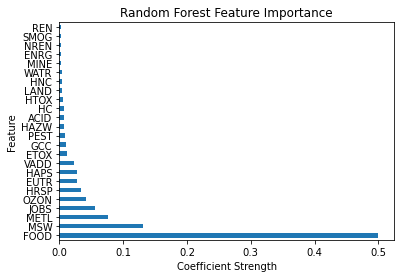

In [7]:
ind = np.argsort(regressor.feature_importances_)[::-1]
imp = regressor.feature_importances_[ind][:24]
cols =x1.columns[ind][:24]
pl = pd.Series(imp, index=cols).plot(kind='barh', title='Random Forest Feature Importance')
pl.set_xlabel("Coefficient Strength")
pl.set_ylabel("Feature")

# Random Forest Regressor for HTOX,HC

### Splitting to test and train

In [8]:
from sklearn.model_selection import train_test_split
x1=data[['HTOX','HC']]

y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)


XTrain (2193, 2)
XTest (940, 2)


### Creating Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with 10 trees
regressor2 = RandomForestRegressor(n_estimators = 100,
                                  random_state = RSEED)

# Fit on training data
regressor2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

### Evaluation

In [10]:
from sklearn import metrics
train_rf_predictions = regressor2.predict(X_train)
rf_predictions = regressor2.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",regressor2.score(X_test, y_test))

Evaluation for train:

Accuracy Train -inf%
r2_score Train: 0.9406317407812158


Evaluation for test:

Accuracy Test -inf%
r2_score Test: 0.41378470045227933
score 0.41378470045227933


Text(0, 0.5, 'Feature')

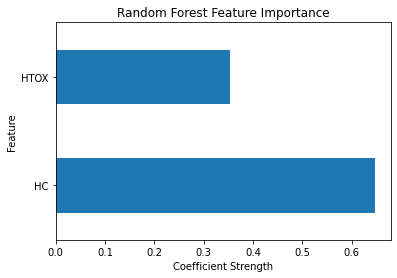

In [11]:
ind = np.argsort(regressor2.feature_importances_)[::-1]
imp = regressor2.feature_importances_[ind][:2]
cols =x1.columns[ind][:2]
#print(imp)
pl = pd.Series(imp, index=cols).plot(kind='barh', title='Random Forest Feature Importance')
pl.set_xlabel("Coefficient Strength")
pl.set_ylabel("Feature")

# Logistic Regression for environmental factors in a county and cancer rates

### Splitting test and train

In [12]:
from sklearn.model_selection import train_test_split
x1=data.loc[:, :'WATR']
y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)



XTrain (2193, 24)
XTest (940, 24)


### Creating LR model

In [13]:
from sklearn.linear_model import LogisticRegression
# Create the model 
lr = LogisticRegression()

# Fit on training data
lr.fit(X_train, y_train)

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation

In [14]:
from sklearn import metrics
train_rf_predictions = lr.predict(X_train)
rf_predictions = lr.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",lr.score(X_test, y_test))

Evaluation for train:

Accuracy Train -inf%
r2_score Train: 0.8585743357921237


Evaluation for test:

Accuracy Test -inf%
r2_score Test: 0.4621527729275319
score 0.06170212765957447


In [15]:
#ind = np.argsort(np.abs(lr.coef_))[::-1][:24]
#cols =x1.columns[ind]
#vals = np.sort(np.abs(lr.coef_))[::-1][:24]
#print(cols,vals)
#pt = pd.Series(vals, index=cols).plot('barh', title = 'Important variables in Linear Regression')
#pl.set_xlabel("Coefficient Strength")
#pl.set_ylabel("Feature")

# Logistic Regression for HTOX,HC

### Splitting test and train

In [16]:
from sklearn.model_selection import train_test_split
x1=data[['HTOX','HC']]

y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)


XTrain (2193, 2)
XTest (940, 2)


### Creating LR model

In [17]:
from sklearn.linear_model import LogisticRegression
# Create the model 
lr = LogisticRegression()

# Fit on training data
lr.fit(X_train, y_train)

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation

In [18]:
from sklearn import metrics
train_rf_predictions = lr.predict(X_train)
rf_predictions = lr.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",lr.score(X_test, y_test))

Evaluation for train:

Accuracy Train 0.3190437064941989%
r2_score Train: 0.4714775218611794


Evaluation for test:

Accuracy Test -0.16613741029571827%
r2_score Test: 0.11461408330990763


# SVR for environmental factors in a county and cancer rates

### Splitting test and train

In [25]:
from sklearn.model_selection import train_test_split
x1=data.loc[:, :'WATR']
y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)



XTrain (2193, 24)
XTest (940, 24)


### Creating SVR model

In [26]:
from sklearn.svm import LinearSVR
# Create the model 

svr = LinearSVR(random_state=0, tol=1e-5)
# Fit on training data
svr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=1e-05, verbose=0)

### Evaluation

In [27]:
from sklearn import metrics
train_rf_predictions = svr.predict(X_train)
rf_predictions = svr.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",svr.score(X_test, y_test))

Evaluation for train:

Accuracy Train -inf%
r2_score Train: 0.32574365212920087


Evaluation for test:

Accuracy Test -inf%
r2_score Test: 0.1925047582004683
score 0.1925047582004683


# SVR for HTOX,HC

### splitting for test and train

In [28]:
from sklearn.model_selection import train_test_split
x1=data[['HTOX','HC']]

y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)


XTrain (2193, 2)
XTest (940, 2)


### Creating SVR model

In [29]:
from sklearn.svm import LinearSVR
# Create the model 

svr = LinearSVR(random_state=0, tol=1e-5)
# Fit on training data
svr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=1e-05, verbose=0)

### Evaluation

In [30]:
from sklearn import metrics
train_rf_predictions = svr.predict(X_train)
rf_predictions = svr.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",svr.score(X_test, y_test))

Evaluation for train:

Accuracy Train -inf%
r2_score Train: -0.0294099288709071


Evaluation for test:

Accuracy Test -inf%
r2_score Test: -0.08589664158110089
score -0.08589664158110089
